# AMZ roBERTo Classifier

This notebook inspired in BERT/roBERTa models andd attaches an output layer that works as multiclassification. 
This model is trained with a spanish Amazon Reviews corpus.

In [2]:
# !pip install -r https://raw.githubusercontent.com/ernestomancebo/roberto-mlm/master/requirements.txt

     |████████████████████████████████| 264 kB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 29.3 MB/s 
     |████████████████████████████████| 2.6 MB 25.4 MB/s 
     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 11.3 MB 29 kB/s 
     |████████████████████████████████| 10.3 MB 6.3 MB/s 
     |████████████████████████████████| 292 kB 31.8 MB/s 
     |████████████████████████████████| 119 kB 33.3 MB/s 
     |████████████████████████████████| 243 kB 46.2 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 38.2 MB/s 
     |████████████████████████████████| 636 kB 42.9 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting u

In [ ]:
!pip install -r requirements.txt

In [1]:
from datasets import load_dataset

dataset = load_dataset("amazon_reviews_multi", "es")
dataset

Downloading: 7.16kB [00:00, 371kB/s]                    
Downloading: 37.4kB [00:00, 4.97MB/s]                   


Downloading: 100%|██████████| 77.5M/77.5M [00:59<00:00, 1.30MB/s]
Downloading: 100%|██████████| 1.93M/1.93M [00:02<00:00, 656kB/s]
Downloading: 100%|██████████| 1.94M/1.94M [00:03<00:00, 527kB/s]


Dataset amazon_reviews_multi downloaded and prepared to /Users/ernestomancebo/.cache/huggingface/datasets/amazon_reviews_multi/es/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [2]:
train_df = dataset['train'].to_pandas()
validation_df = dataset['validation'].to_pandas()
test_df = dataset['test'].to_pandas()

train_df.sample(5)[['stars', 'review_body']]

,stars,review_body
12084,1,La mensajería de esta empresa deja mucho que d...
121338,4,Muy buena pero un poco mas grande de lo normal
147364,4,muy util para una urgencia. Un buen producto
8153,1,"Se ha roto con una sola salida, muy malo. Es m..."
89051,3,Cierto es que es cómoda y que cubre todo el te...


In [5]:
model.save('sentiment_roberto')
# body_len = [len(str(x).split()) for x in dataset['review_body']]


In [4]:
model.summary()
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='Paired', font_scale=1.2)
rcParams['figure.figsize']= 12,8

/Users/ernestomancebo/projects/coloquial_bot/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Start Rating')

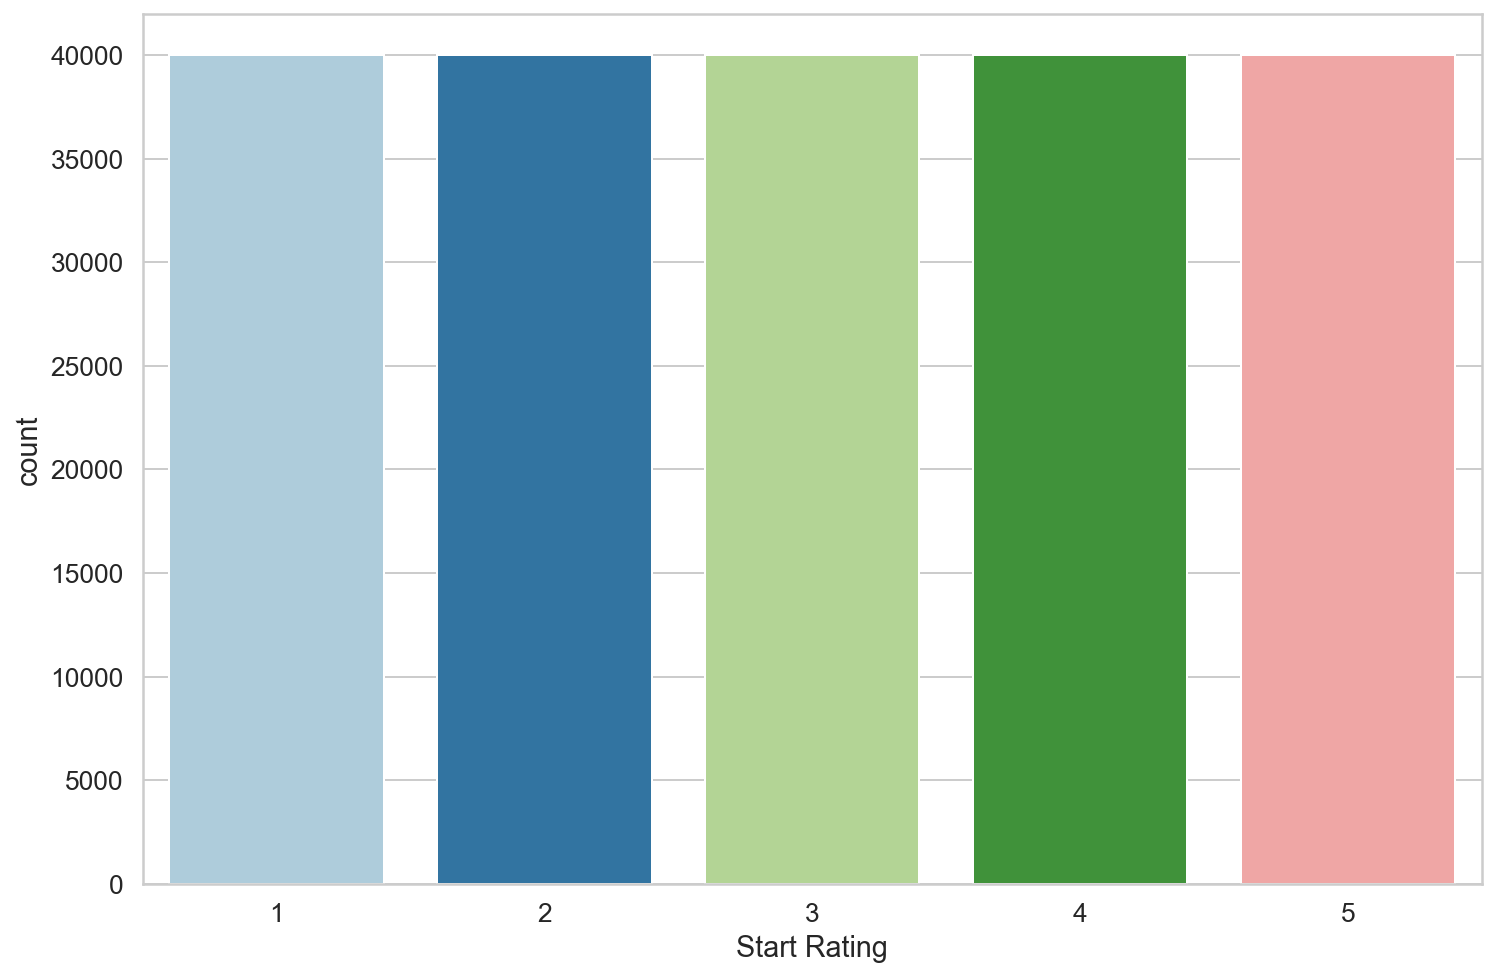

In [5]:
_ = sns.countplot(train_df['stars'])
plt.xlabel('Start Rating')


## Add `sentiment` column

Polarizes a bit the dataset by condensing the 1-2 as negative, the 4-5 as positive, keeping the neutral as neutral

In [7]:
model.summary()
  val = int(rating)

  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

In [8]:
model.summary()
test_df['sentiment'] = test_df['stars'].apply(to_sentiment)
validation_df['sentiment'] = validation_df['stars'].apply(to_sentiment)


/Users/ernestomancebo/projects/coloquial_bot/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

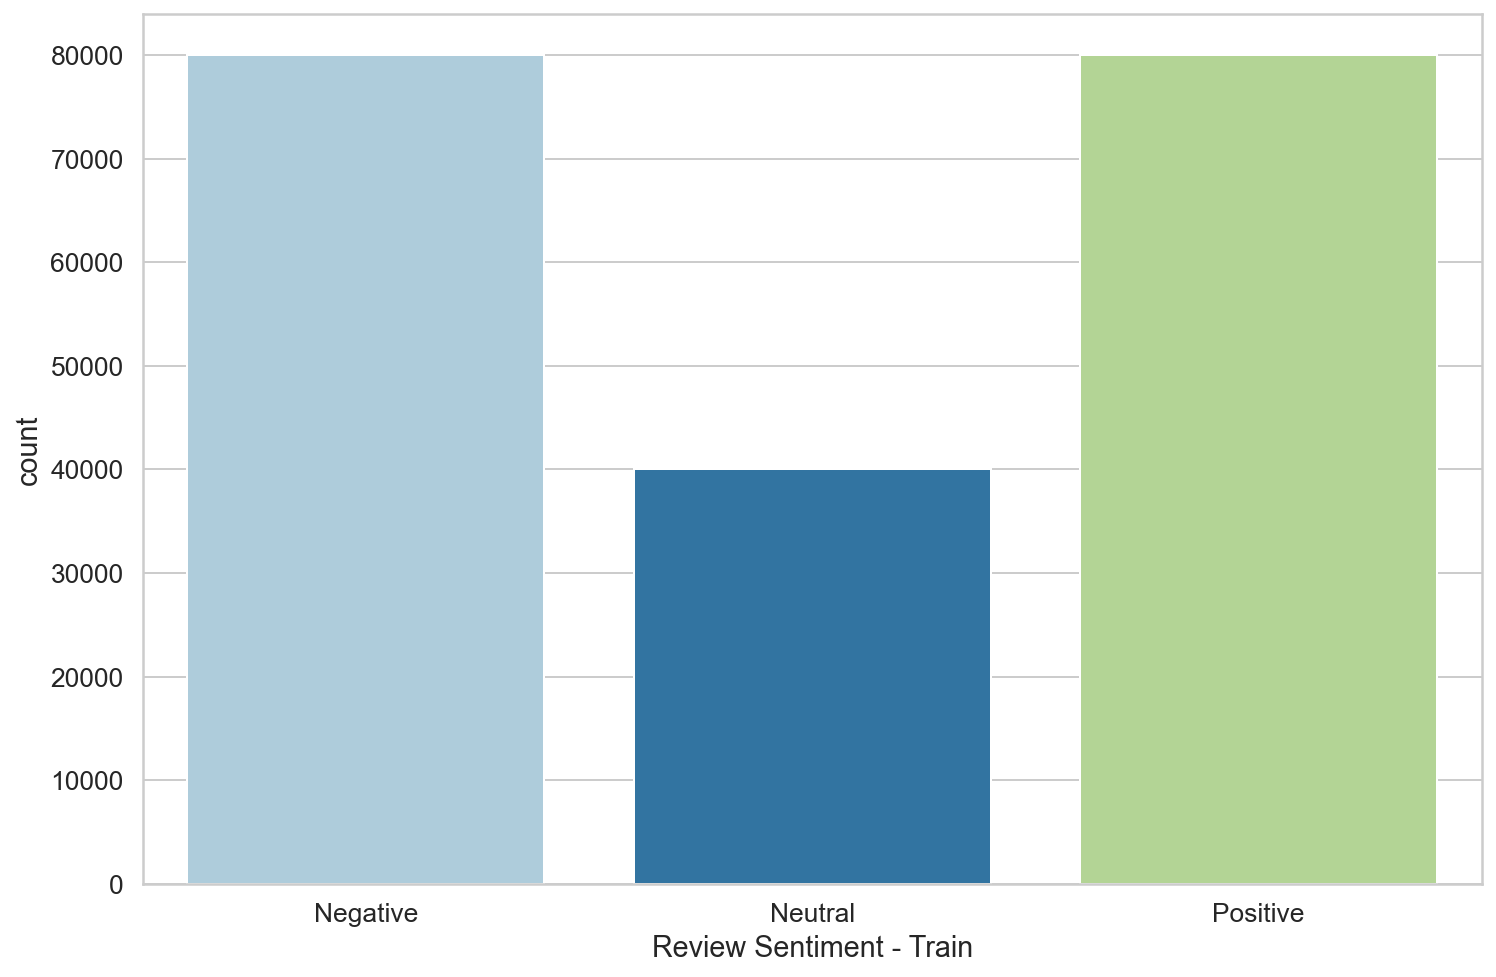

In [9]:
model.summary()

ax = sns.countplot(train_df['sentiment'])
plt.xlabel('Review Sentiment - Train')
ax.set_xticklabels(class_names)


## Data pre-processing

In [16]:
from transformers import BertTokenizer


In [11]:
MODEL_NAME = 'Geotrend/bert-base-es-cased'


In [17]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Downloading: 100%|██████████| 174k/174k [00:00<00:00, 768kB/s] 


### Choosing sequence length

In [18]:
token_lens = []

for s in train_df['review_body']:
  tokens = tokenizer.encode(s, max_length=512, truncation=True)
  token_lens.append(len(tokens))

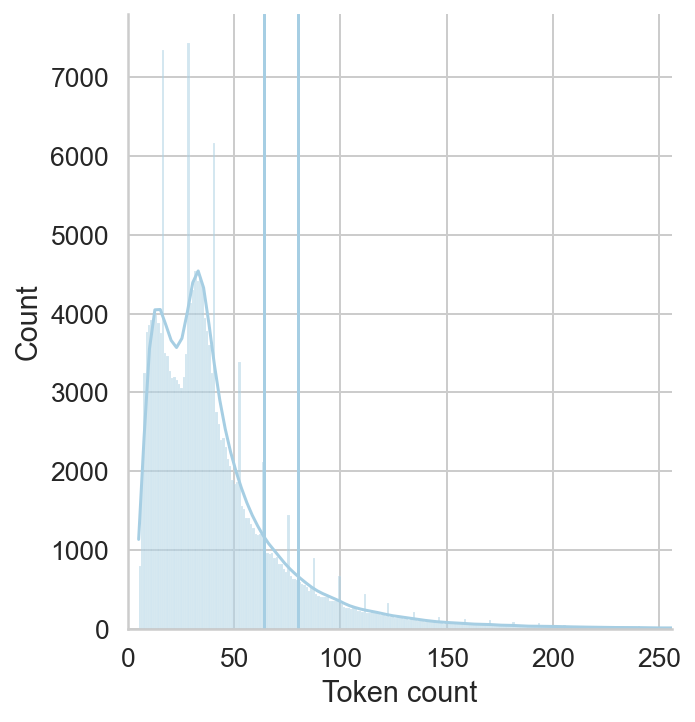

In [23]:
sns.displot(token_lens, kde=True)
plt.xlim([0,256])
plt.xlabel('Token count')

plt.axvline(x=80)
plt.axvline(x=64)


Most reviews drops after 50, so we're picking no further than 64

In [26]:
SEQ_MAX_LEN = 64

### Building datasets

In [27]:
def tokenize_sequence(sequence):
    tokens = tokenizer.encode_plus(sequence,
                                   max_length=SEQ_MAX_LEN,
                                   truncation=True,
                                   padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf')
    return tokens


tokenize_sequence('hola, buen dia')


{'input_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[   11, 26300,   214,    25, 13900,   626,    12,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 

In [29]:
train_df.shape


(200000, 9)

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
train_set, _ = train_test_split(
    train_df,
    train_size=0.3, 
    random_state=RANDOM_SEED,
    shuffle=True,
    stratify=train_df['sentiment']
)

train_set.shape

(60000, 9)

### Train and Validation sets

In [36]:
import numpy as np

In [37]:
np.random.seed(RANDOM_SEED)

In [52]:
def tokenize_dataframe(df, seq_max_len=SEQ_MAX_LEN):
    Xids = np.zeros((df.shape[0], seq_max_len))
    Xmask = np.zeros((df.shape[0], seq_max_len))

    for i, review in enumerate(df['review_body']):
        tokens = tokenize_sequence(review)

        Xids[i, :] = tokens['input_ids']
        Xmask[i, :] = tokens['attention_mask']

    return Xids, Xmask


In [82]:
def label_as_vector(df, target='sentiment'):
    labels = np.zeros((df.shape[0], df[target].max() + 1))

    for i, label in enumerate(df[target]):
        labels[i, label] = 1

    return labels


In [53]:
Xids_train, Xmask_train = tokenize_dataframe(train_set)
Xids_val, Xmask_val = tokenize_dataframe(validation_df)

60000

In [83]:
labels_train = label_as_vector(train_set)
labels_val = label_as_vector(validation_df)

labels_train[:4]


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [55]:
Xids_train.shape, Xids_val.shape

((60000, 64), (5000, 64))

In [11]:
# from transformers import BertTokenizer
#     tokens = tokenize_sequence(seq)

#     Xids[i, :] = tokens['input_ids']
#     Xmask[i, :] = tokens['attention_mask']


In [12]:
# model = tf.keras.models.load_model('sentiment_roberto')


array([[1.1000e+01, 6.6000e+02, 2.5000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1000e+01, 1.0850e+04, 8.2900e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1000e+01, 2.4499e+04, 2.1400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.1000e+01, 1.5980e+03, 1.2980e+03, ..., 2.0500e+02, 2.0104e+04,
        1.2000e+01],
       [1.1000e+01, 6.1980e+03, 5.8350e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1000e+01, 2.5800e+02, 2.8150e+03, ..., 1.7193e+04, 5.3450e+03,
        1.2000e+01]])

In [13]:
# Xmask[2]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# model = tf.keras.models.load_model('sentiment_roberto')


array([1, 2, 3, 4, 5])

### Serializing training vectors

Here we store as numpy vectors the `Xids_train,validation` and `Xmask_train,validation`

In [56]:
import numpy as np

In [57]:
np.random.seed(RANDOM_SEED)

In [ ]:
import os

In [17]:
def serialize_tensors(tensor, name, path):
    with open(f'{os.sep.join([path, name])}', 'wb') as file:
        np.save(file, tensor)


In [18]:
def load_tensors(name, path):
    with open(os.sep.join([path, name]), 'rb') as f:
        return np.load(f)


In [58]:
tensors_path = os.sep.join(['.', 'tensors', 'classifier', 'amz', '60k'])


In [59]:
!mkdir -p {tensors_path}


(3872, 5)

In [16]:
# from transformers import BertTokenizer

# labels[:5]


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Here we persist the vectors in the `tensor_path`

In [25]:
# serialize_tensors(Xids_train, 'Xids_train.npy', tensors_path)
# serialize_tensors(Xmask_train, 'Xmask_train.npy', tensors_path)
# serialize_tensors(labels_train, 'labels_train.npy', tensors_path)

# !ls {tensors_path}


labels.npy  Xids.npy  Xmask.npy


In [ ]:
# serialize_tensors(Xids_val, 'Xids_val.npy', tensors_path)
# serialize_tensors(Xmask_vaXids_val, 'Xmask_vaXids_val.npy', tensors_path)
# serialize_tensors(labels_vaXids_val, 'labels_vaXids_val.npy', tensors_path)

# !ls {tensors_path}


In [ ]:
# del Xids_train, Xmask_train, labels_train
# del Xids_val, Xmask_val, labels_val


Here we reload the tensors from the `tensors_path`

In [ ]:
!ls {tensors_path}

In [ ]:
# Train vectors
Xids_train = load_tensors('Xids_train.npy', tensors_path)
Xmask_train = load_tensors('Xmask_train.npy', tensors_path)
labels_train = load_tensors('labels_train.npy', tensors_path)


In [ ]:
Xids_val = load_tensors('Xids_val.npy', tensors_path)
Xmask_val = load_tensors('Xmask_val.npy', tensors_path)
labels_val = load_tensors('labels_val.npy', tensors_path)


---

## Input pipeline

In [76]:
import tensorflow as tf

In [77]:
tf.random.set_seed(RANDOM_SEED)

In [78]:
devices = tf.config.experimental.list_physical_devices('GPU')
devices

[]

Here we build sum `Dataset` from the built vectors

In [84]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (Xids_train, Xmask_train, labels_train))
val_dataset = tf.data.Dataset.from_tensor_slices(
    (Xids_val, Xmask_val, labels_val))


In [85]:
train_dataset.take(1)

<TakeDataset shapes: ((64,), (64,), (3,)), types: (tf.float64, tf.float64, tf.float64)>

In [86]:
def map_tensor(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels


In [87]:
train_dataset = train_dataset.map(map_tensor)
val_dataset = val_dataset.map(map_tensor)


train_dataset.take(1)


<TakeDataset shapes: ({input_ids: (64,), attention_mask: (64,)}, (3,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [88]:
train_dataset = train_dataset.shuffle(100_000).batch(64, drop_remainder=False)
val_dataset = val_dataset.shuffle(10_000).batch(64, drop_remainder=False)

train_dataset.take(1)


<TakeDataset shapes: ({input_ids: (None, 64), attention_mask: (None, 64)}, (None, 3)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [25]:
# DS_LEN = len(list(dataset))
# DS_LEN


242

In [26]:
!pip install - r requirements.txt

# train = dataset.take(round(DS_LEN * SPLIT))
# val = dataset.skip(round(DS_LEN * SPLIT))

# del dataset


---

## Training the model

In [93]:
!pip install - r requirements.txt


In [91]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)


In [94]:
bert = TFAutoModel.from_pretrained(MODEL_NAME)


Downloading: 100%|██████████| 510M/510M [02:26<00:00, 3.47MB/s]
Some layers from the model checkpoint at Geotrend/bert-base-es-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at Geotrend/bert-base-es-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [95]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  106285056 
Total params: 106,285,056
Trainable params: 106,285,056
Non-trainable params: 0
_________________________________________________________________


In [96]:
input_ids = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='attention_mask', dtype='int32')

embedings = bert.bert(input_ids, attention_mask=mask)[1]

# x = tf.keras.layers.Flatten()(embedings)
x = tf.keras.layers.Dense(128, activation='relu')(embedings)

# There're only three possible outcomes
y = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

model.layers[2].trainable = False


In [97]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 64)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 106285056   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          98432       bert[0][1]                   

In [31]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 106285056   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          98432       bert[0][1]                   

In [99]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])


In [100]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=4,
)


Epoch 1/4


2021-09-04 11:50:02.027571: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


  1/938 [..............................] - ETA: 13:40:23 - loss: 1.1543 - accuracy: 0.2188

KeyboardInterrupt: 

In [40]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


INFO:tensorflow:Assets written to: sentiment_roberto/assets


INFO:tensorflow:Assets written to: sentiment_roberto/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [41]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


  adding: sentiment_roberto/ (stored 0%)
  adding: sentiment_roberto/assets/ (stored 0%)
  adding: sentiment_roberto/saved_model.pb (deflated 92%)
  adding: sentiment_roberto/keras_metadata.pb (deflated 95%)
  adding: sentiment_roberto/variables/ (stored 0%)
  adding: sentiment_roberto/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: sentiment_roberto/variables/variables.index (deflated 76%)


---

In [42]:
tokenizer = BertTokenizer.from_pretrained(model_name)

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [43]:
tokenizer = BertTokenizer.from_pretrained(model_name)


---

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  from google.colab import drive

  drive.mount('/content/gdrive')

  !cp "/content/gdrive/MyDrive/proyectos/machine learning/sentiment_analysis/sentiment_roberto.zip" .

Mounted at /content/gdrive


In [2]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


Archive:  sentiment_roberto.zip
   creating: sentiment_roberto/
   creating: sentiment_roberto/assets/
  inflating: sentiment_roberto/saved_model.pb  
  inflating: sentiment_roberto/keras_metadata.pb  
   creating: sentiment_roberto/variables/
  inflating: sentiment_roberto/variables/variables.data-00000-of-00001  
  inflating: sentiment_roberto/variables/variables.index  


In [3]:
# tokenizer = BertTokenizer.from_pretrained(model_name)
# # 

     |████████████████████████████████| 264 kB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 34.9 MB/s 
     |████████████████████████████████| 2.6 MB 33.7 MB/s 
     |████████████████████████████████| 76 kB 2.6 MB/s 
     |████████████████████████████████| 11.3 MB 34.6 MB/s 
     |████████████████████████████████| 10.3 MB 29.8 MB/s 
     |████████████████████████████████| 292 kB 13.0 MB/s 
     |████████████████████████████████| 243 kB 48.1 MB/s 
     |████████████████████████████████| 119 kB 46.8 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 636 kB 47.6 MB/s 
     |████████████████████████████████| 895 kB 50.5 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attemptin

In [4]:
# import tensorflow as tf

In [6]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


In [28]:
# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
bert (Custom>TFBertMainLayer)   {'pooler_output': (N 106285056   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          98432       bert[0][1]                   

In [7]:
# tokenizer = BertTokenizer.from_pretrained(model_name)


In [9]:
# from transformers import BertTokenizer

In [10]:
# tokenizer = BertTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/174k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/659 [00:00<?, ?B/s]

In [16]:
def prepare_data(text):
    tokens = tokenize_sequence(text)
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}


In [40]:
input_tensor = prepare_data('Pudo haber sido mejor')

probs = model.predict(input_tensor)[0]
probs

array([0.10558031, 0.23227973, 0.3313494 , 0.21261229, 0.11817823],
      dtype=float32)

In [18]:
import numpy as np

In [41]:
np.argmax(probs)

2

In [36]:
input_tensor = prepare_data('Me pareció muy buena ')

probs = model.predict(input_tensor)[0]
probs


array([0.09737257, 0.26411855, 0.3125822 , 0.2078706 , 0.11805607],
      dtype=float32)

In [35]:
probs[2]

0.33177188

In [37]:
np.argmax(probs)

2

In [47]:
frases = ['No me gusto para nada', 'Estuvo muy buena, excelente',
          'Creo pudo mejorar', 'Estuvo totalmente maravillosa', 
          'Horrible', 'Bien', 'No tiene nada que ver el resultado',
          'La viera otra vez']

for f in frases:
  input = prepare_data(f)
  p = model.predict(input)[0]

  print(f'Highest: {np.argmax(p)} from {p}')

Highest: 2 from [0.09779301 0.23596473 0.30954877 0.22503732 0.13165626]
Highest: 2 from [0.10167223 0.21692628 0.27523494 0.26554176 0.14062475]
Highest: 2 from [0.12497162 0.22514386 0.29618528 0.21158129 0.14211792]
Highest: 2 from [0.08251777 0.20117098 0.39224193 0.22311923 0.10095011]
Highest: 3 from [0.12589279 0.19004318 0.24804491 0.30254513 0.13347396]
Highest: 3 from [0.11276485 0.23152219 0.21121958 0.28117046 0.16332294]
Highest: 2 from [0.09095988 0.23589207 0.35352877 0.20633574 0.11328353]
Highest: 2 from [0.11157091 0.27421793 0.29390407 0.20497024 0.11533682]
